In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
from IPython.display import Image

# 데이터 변수 설명
- https://www.dacon.io/competitions/official/235679/talkboard/401866?page=1&dtype=recent&ptype=pub

In [2]:
df_people = pd.read_csv('data/new_people.csv',encoding='cp949')
df_process = pd.read_csv('data/process.csv',low_memory=False)
df_suggest = pd.read_csv('data/suggest.csv')

In [3]:
pp = df_people.copy()
pc = df_process.copy()
sg = df_suggest.copy()

In [4]:
# 정희용 의원 생년월일만 빠져있어서 채워주었습니다.
pp.loc[pp['BIRTH'] == '    년   월   일' , 'BIRTH'] = '1976년 10월 01일'

In [5]:
sg

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤"
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두"
2,PRC_C2Q0L1M0V0B5G1O8H1N6Z5V0W5W7A7,2104400,농업기계화 촉진법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표"
3,PRC_F2A0Q1V0F0S5O1N8W1P6L2Z9T9D6K3,2104399,지방교부세법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,신정훈,오영환,윤재갑,윤준병,이개호,이성만,전혜숙,최형두"
4,PRC_C2N0L1B0M0O5S1P8T0O6I1O8S4J8O7,2104398,농수산물의 원산지 표시에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표"
...,...,...,...,...,...,...,...,...,...,...,...,...
62653,000021,10025,반민족행위특별재판부부속기관조직법안,NaN,1948-11-23,원안가결,1,http://likms.assembly.go.kr/bill/billDetail.do...,김상덕의원외9인,http://likms.assembly.go.kr/bill/coactorListPo...,NaN,NaN
62654,000022,10024,반민족행위처벌법중개정법률안,NaN,1948-11-23,원안가결,1,http://likms.assembly.go.kr/bill/billDetail.do...,김상덕의원외9인,http://likms.assembly.go.kr/bill/coactorListPo...,NaN,NaN
62655,000018,10021,농지개혁법안,NaN,1948-11-13,대안반영폐기,1,http://likms.assembly.go.kr/bill/billDetail.do...,이훈구의원외31인,http://likms.assembly.go.kr/bill/coactorListPo...,NaN,NaN
62656,000014,10015,한글전용에관한법률안,NaN,1948-09-29,원안가결,1,http://likms.assembly.go.kr/bill/billDetail.do...,권태희의원외138인,http://likms.assembly.go.kr/bill/coactorListPo...,NaN,NaN


In [6]:
pp['year'] = pp['DAESU'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})
sg['year'] = sg['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

pc['year'] = pc['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

In [7]:
list_dae = pc.AGE.unique().tolist()

In [8]:
# pp_dae1 ,pp_dae2 ....
for i in list_dae:
    globals()['pp_dae'+str(i)] = pp[pp.DAESU == i]

# pc_dae1 ,pc_dae2 ....
for i in list_dae:
    globals()['pc_dae'+str(i)] = pc[pc.AGE == i]

# sg_dae1, sg_dae2 ...
for i in list_dae:
    globals()['sg_dae'+str(i)] = sg[sg.AGE == i]

In [9]:
# 대 수 별 국회의원 나이 list 및 정보

def minmaxage(dataframe):
    dataframe = dataframe.reset_index(drop=True)
    agelist=[]
    agelist2=[]
    st = int(dataframe.year[0].replace('(','~').replace(')','~').split('~')[1])
    for i in range(len(dataframe)):
        byear = int(dataframe.BIRTH[i][:4])
        agelist.append(st-byear)
    
    maxage = max(agelist); a=agelist.index(maxage)
    maxname = dataframe.loc[a,'NAME']
    agelist2.append([maxname,maxage])
    
    minage = min(agelist); b=agelist.index(minage)
    minname = dataframe.loc[b,'NAME']
    agelist2.append([minname,minage])
    
    avgage = round(sum(agelist)/len(agelist))
    agelist2.append(['평균나이',avgage])
     
    return agelist2

In [10]:
dae_list=[pp_dae1,pp_dae2,pp_dae3,pp_dae4,pp_dae5,pp_dae6,pp_dae7,pp_dae8,pp_dae9,pp_dae10,
          pp_dae11,pp_dae12,pp_dae13,pp_dae14,pp_dae15,pp_dae16,pp_dae17,pp_dae18,pp_dae19,pp_dae20,pp_dae21]


In [11]:
allage=[]
for i in dae_list:
    agelist = minmaxage(i)
    allage.append(agelist)

In [12]:
list_dae2 = pp['year'].unique().tolist()
list_dae2.reverse()

In [13]:
allage_mean=[]
allage_max=[]
allage_min=[]
allage_maxname=[]
allage_minname=[]
for i in range(21):
    allage_mean.append(allage[i][2][1])
    allage_max.append(allage[i][0][1])
    allage_min.append(allage[i][1][1])
    allage_maxname.append(allage[i][0][0])
    allage_minname.append(allage[i][1][0])

In [14]:
df_age = pd.DataFrame()
df_age['대'] = list_dae2
df_age['평균나이'] = allage_mean
df_age['최고령의원이름'] = allage_maxname
df_age['최고령나이'] = allage_max
df_age['최연소의원이름'] = allage_minname
df_age['최연소나이'] = allage_min

In [15]:
df_age

,대,평균나이,최고령의원이름,최고령나이,최연소의원이름,최연소나이
0,1대(1948~1950),47,홍순영,81,배중혁,26
1,2대(1950~1954),47,백상규,69,김종회,27
2,3대(1954~1958),46,전상요,71,김영삼,27
3,4대(1958~1960),48,정문흠,66,강영훈,31
4,5대(1960~1963),48,김시현,78,전휴상,26
5,6대(1963~1967),47,이상철,70,김상현,28
6,7대(1967~1971),47,김도연,73,이기택,30
7,8대(1971~1972),49,유봉영,74,조홍래,31
8,9대(1973~1979),49,이숙종,69,정대철,29
9,10대(1979~1980),51,이효상,73,정대철,35


Text(0.5, 1.0, '대 별 국회의원 평균나이')

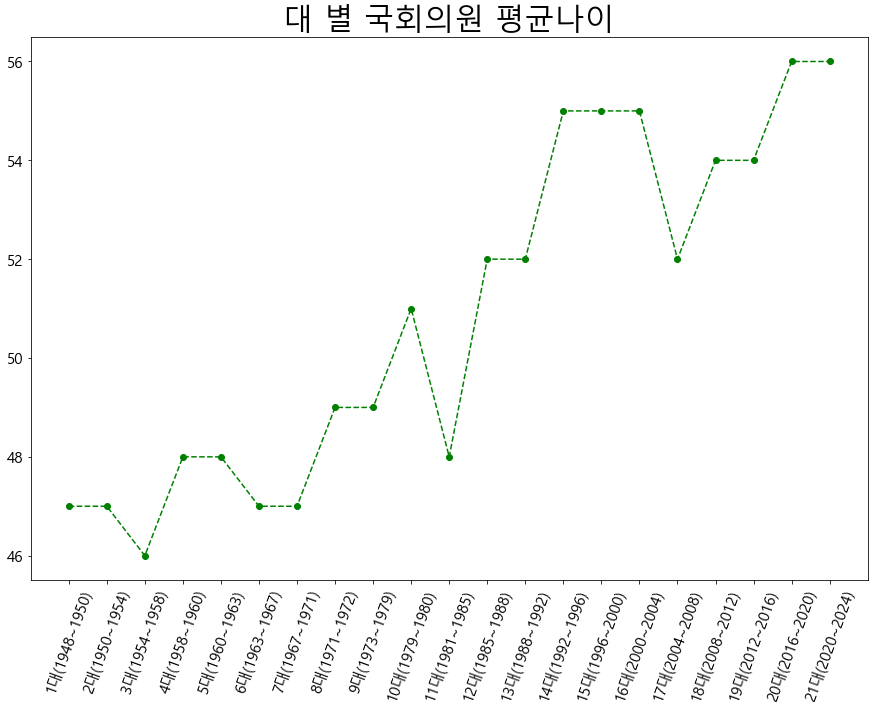

In [16]:
plt.figure(figsize=(15,10))
plt.plot(df_age['대'],df_age['평균나이'],label="평균나이",linestyle='--',color='g',marker='o')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.title('대 별 국회의원 평균나이',size=30)

In [17]:
sg_dae21

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER,year
0,PRC_A2T0Z0E9U1I6P1G3P3X9I3B7H7D9C1,2104402,독점규제 및 공정거래에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,박홍근의원등12인,http://likms.assembly.go.kr/bill/coactorListPo...,박홍근,"김원이,남인순,서영석,송옥주,용혜인,윤미향,이용빈,장경태,정태호,주철현,최종윤",21대(2020~2024)
1,PRC_I2M0O1G0U0P5E1U8T4B6Z0R9M8G5X0,2104401,지방교육재정교부금법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,서삼석,신정훈,오영환,윤재갑,이개호,이성만,전혜숙,최형두",21대(2020~2024)
2,PRC_C2Q0L1M0V0B5G1O8H1N6Z5V0W5W7A7,2104400,농업기계화 촉진법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표",21대(2020~2024)
3,PRC_F2A0Q1V0F0S5O1N8W1P6L2Z9T9D6K3,2104399,지방교부세법 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,서영교의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,서영교,"김병기,신정훈,오영환,윤재갑,윤준병,이개호,이성만,전혜숙,최형두",21대(2020~2024)
4,PRC_C2N0L1B0M0O5S1P8T0O6I1O8S4J8O7,2104398,농수산물의 원산지 표시에 관한 법률 일부개정법률안,NaN,2020-10-05,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,윤재갑의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,윤재갑,"강병원,김수흥,서영교,위성곤,이개호,이재정,이정문,전용기,조경태,홍문표",21대(2020~2024)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,PRC_B2B0G0T6X0U1K1Q0O4J1N2F5Z0N2O4,2100005,고등교육법 일부개정법률안,교육위원회,2020-06-01,대안반영폐기,21,http://likms.assembly.go.kr/bill/billDetail.do...,이종배의원 등 103인,http://likms.assembly.go.kr/bill/coactorListPo...,이종배,"강기윤,강대식,강민국,곽상도,구자근,권명호,권영세,김기현,김도읍,김미애,김병욱,김상...",21대(2020~2024)
4011,PRC_M2V0W0X6Y0Z1R1M0P1B4Q0C9S5U4D6,2100004,감염병의 예방 및 관리에 관한 법률 일부개정법률안,보건복지위원회,2020-06-01,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,이종배의원 등 103인,http://likms.assembly.go.kr/bill/coactorListPo...,이종배,"강기윤,강대식,강민국,곽상도,구자근,권명호,권영세,김기현,김도읍,김미애,김병욱,김상...",21대(2020~2024)
4012,PRC_X2T0K0O6X0Q1Y0S9M2L4W3O3J7O9H9,2100003,장애인활동 지원에 관한 법률 일부개정법률안,보건복지위원회,2020-06-01,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,장제원의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,장제원,"권성동,김정재,박덕흠,박성중,송석준,윤영석,윤한홍,이양수,이종배,추경호,홍문표",21대(2020~2024)
4013,PRC_X2P0C0O6K0J1F0V9R1K6F4T1X7Y6Q8,2100002,정부조직법 일부개정법률안,행정안전위원회,2020-06-01,NaN,21,http://likms.assembly.go.kr/bill/billDetail.do...,신현영의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,신현영,"고용진,김경만,김병욱,김병주,김성주,도종환,박병석,박홍근,안민석,유정주,이낙연",21대(2020~2024)


In [18]:
top5_name21 = sg_dae21['RST_PROPOSER'].value_counts().head(5).index.tolist()
top5_count21 = sg_dae21['RST_PROPOSER'].value_counts().head(5).values.tolist()

In [19]:
def lawcount_top5(dataframe):
    a = dataframe['RST_PROPOSER'].value_counts().head(5).index.tolist()
    b = dataframe['RST_PROPOSER'].value_counts().head(5).values.tolist()
    return a+b

In [20]:
lawcount_top5(sg_dae20)

['황주홍', '박광온', '이찬열', '김도읍', '박정', 696, 389, 324, 238, 228]

In [121]:
sg['year'].value_counts()

20대(2016~2020)    21594
19대(2012~2016)    15444
18대(2008~2012)    11191
17대(2004~2008)     5728
21대(2020~2024)     4015
16대(2000~2004)     1651
15대(1996~2000)      806
13대(1988~1992)      462
6대(1963~1967)       313
14대(1992~1996)      252
12대(1985~1988)      181
7대(1967~1971)       179
11대(1981~1985)      164
2대(1950~1954)       124
5대(1960~1963)       115
9대(1973~1979)       113
3대(1954~1958)       113
4대(1958~1960)        93
1대(1948~1950)        74
8대(1971~1972)        41
10대(1979~1980)        5
Name: year, dtype: int64

In [125]:
#대 별 법안 발의안 개수 함수

def lawcount_dae(dataframe):
    a = dataframe['year'].value_counts().values
    return int(a)

In [161]:
lawcount_dae(sg_dae21)

4015

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text major ticklabel objects>)

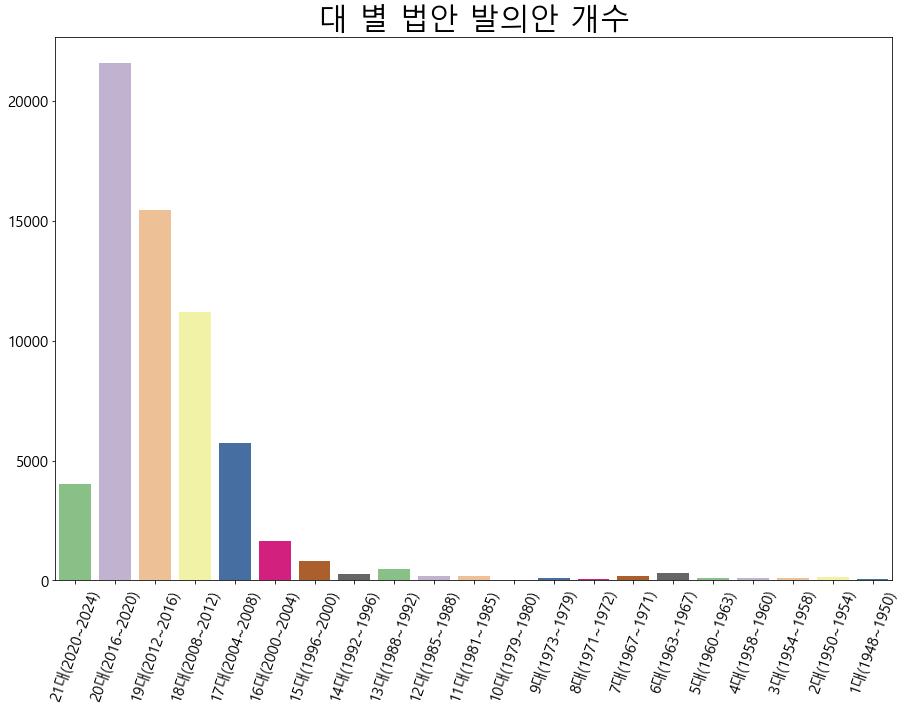

In [21]:
#대 별 법안 발의안 개수
plt.figure(figsize=(15,10))
sns.countplot(data = sg, x = 'year', palette = 'Accent')
plt.title('대 별 법안 발의안 개수',size=30)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)

In [22]:
# 발의법의안 처리 상태 piechart 함수
def lawpie(dataframe):
    pie_ratio = dataframe['PROC_RESULT_CD'].value_counts().values.tolist()
    pie_labels = dataframe['PROC_RESULT_CD'].value_counts().index.tolist()
    plt.figure(figsize=(15,10))
    pie = plt.pie(pie_ratio, autopct='%.1f%%', startangle=90,textprops={'fontsize': 18})
    plt.title('발의법의안 처리 상태', fontsize=20)
    plt.legend(pie_labels,bbox_to_anchor=(1.2, 1.0),loc='upper right',fontsize=12)

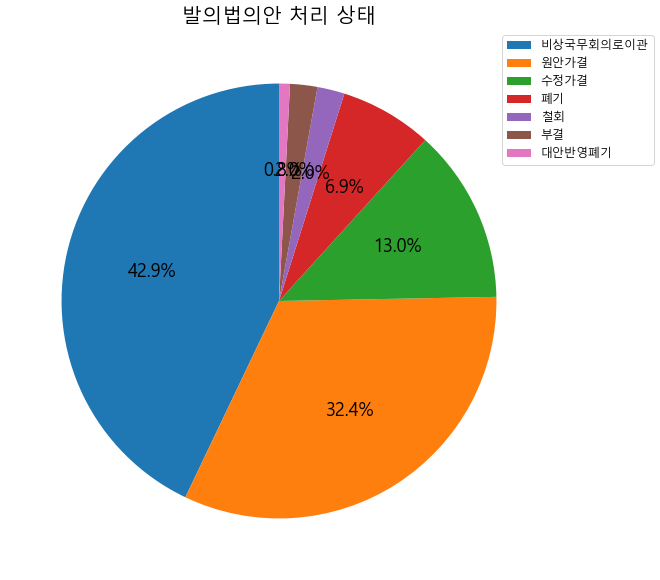

In [95]:
lawpie(pc_dae8)

In [41]:
pie_ratio = pc_dae10['PROC_RESULT_CD'].value_counts().values.tolist()
pie_labels = pc_dae10['PROC_RESULT_CD'].value_counts().index.tolist()
pie_labels
pie_ratio

[141, 70, 45, 44, 3, 2, 2, 1]

In [30]:
pc_rcount=pc.pivot_table(index=['year','PROC_RESULT_CD'],
                         values = 'BILL_NO', 
                         aggfunc='count')

In [98]:
a = pc_rcount.loc['2대(1950~1954)','임기만료폐기',:].values
len(a)

1

In [94]:
b = pc_rcount.loc['8대(1971~1972)',:].values.sum()
b

247

In [106]:
list_임기만료=[]
for i in list_dae2:
    a = pc_rcount.loc[i,'임기만료폐기',:].values
    if len(a)==0:
        a=0
    b = pc_rcount.loc[i,:].values.sum()
    list_임기만료.append(round(float(a/b*100),2))

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text major ticklabel objects>)

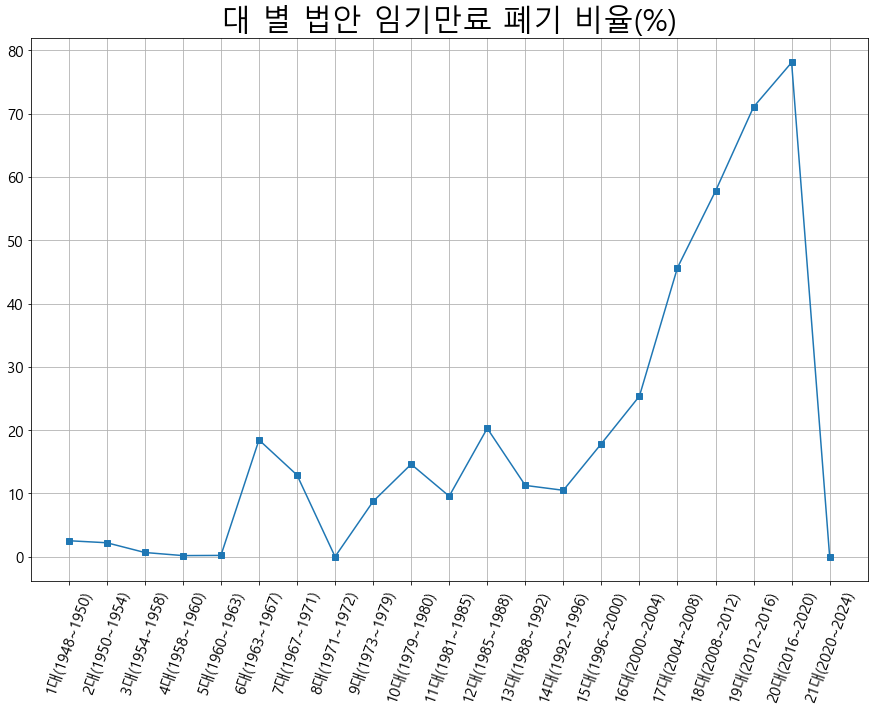

In [130]:
plt.figure(figsize=(15,10))
plt.plot(list_dae2,list_임기만료,marker='s')
plt.title('대 별 법안 임기만료 폐기 비율(%)',size=30)
plt.xticks(rotation = 70,size=15)
plt.grid(True)
plt.yticks(size=15)

In [146]:
sg_dae21['COMMITTEE'].unique()

array([nan, '환경노동위원회', '교육위원회', '문화체육관광위원회', '법제사법위원회', '보건복지위원회',
       '국방위원회', '정무위원회', '기획재정위원회', '행정안전위원회', '여성가족위원회', '국토교통위원회',
       '농림축산식품해양수산위원회', '국회운영위원회', '산업통상자원중소벤처기업위원회', '과학기술정보방송통신위원회',
       '외교통일위원회', '정보위원회'], dtype=object)

In [158]:
# 대 수별 위원회 별 법안 발의 수 함수

def committee_dae(dataframe):
    a = dataframe.pivot_table(index='COMMITTEE',values='BILL_NO',aggfunc='count')
    return a

In [176]:
committee_dae(sg_dae19)


,BILL_NO
COMMITTEE,
공무원연금개혁 특별위원회,10
교육과학기술위원회,25
교육문화체육관광위원회,1454
국방위원회,342
국토교통위원회,1380
국토해양위원회,51
국회운영위원회,344
기획재정위원회,1482
농림수산식품위원회,50


In [181]:
# 대 별 위원회 별 법안 발의안 심사개수 함수

def committee_dae_bar(dataframe):
    plt.figure(figsize=(15,10))
    plt.title('위원회 별 법안 발의안 개수',size=30)
    sns.countplot(dataframe['COMMITTEE'])
    plt.xlabel('')
    plt.xticks(rotation = 70,size=15)
    plt.yticks(size=15)

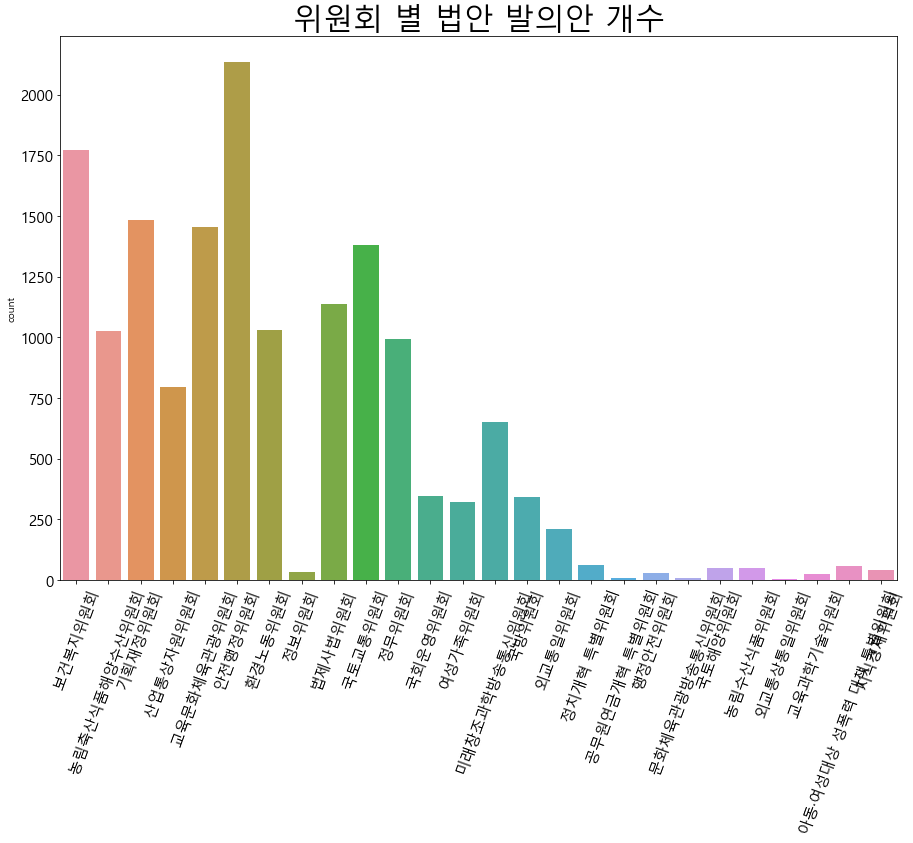

In [182]:
committee_dae_bar(sg_dae19)